In [2]:
%matplotlib inline
import pandas as pd
from sklearn import datasets, linear_model
from numpy import loadtxt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import seaborn as sb

In [3]:
df = pd.read_csv('statedata.csv')

In [4]:
df.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


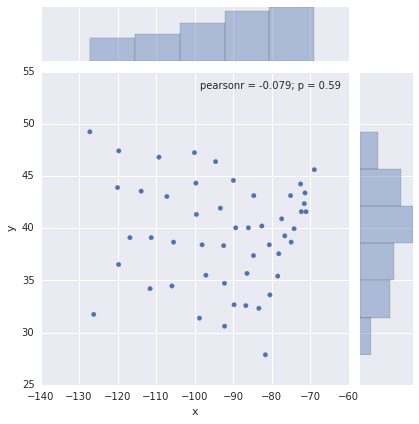

In [5]:
sb.jointplot(df.x, df.y)

In [6]:
#Using the tapply command, determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region

df.groupby('state.region').mean()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
state.region,,,,,,,,,,,
North Central,4803.000000,4611.083333,0.700000,71.766667,5.275000,54.516667,138.833333,62652.000,63794.166667,-92.562783,42.171567
Northeast,5495.111111,4570.222222,1.000000,71.264444,4.722222,53.966667,132.777778,18141.000,18817.000000,-72.756411,42.535956
South,4208.125000,4011.937500,1.737500,69.706250,10.581250,44.343750,64.625000,54605.125,56222.250000,-85.174487,34.610344
West,2915.307692,4702.615385,1.023077,71.234615,7.215385,62.000000,102.153846,134463.000,137227.692308,-114.988769,40.606854


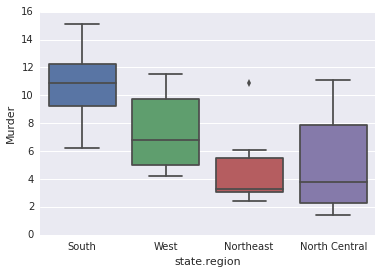

In [7]:
#make a boxplot of the murder rate by region (for more information about creating boxplots
sb.boxplot(df['state.region'],df['Murder'])

In [23]:
# Which state does this correspond to? 
df[(df['state.region']=='Northeast') & (df['Murder']>=10)]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
31,18076,4903,1.4,70.55,10.9,52.7,82,47831,NY,49576,-75.1449,43.1361,Middle Atlantic,New York,Northeast


In [26]:
#We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.

y=df['Life.Exp']
x=df[['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']]
x=sm.add_constant(x)
result = sm.OLS(y,x).fit()

In [27]:
#Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 10 Feb 2016   Prob (F-statistic):           2.53e-10
Time:                        20:31:30   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         70.9432      1.748     40.586      0.000        67.416    74.471
Population   5.18e-05   2.92e-05      1.775      0.083      -7.1e-06     0.000
Income      -2.18e-05      0.000     -0.089      0.929        -0.001     0.000
Illiteracy     0.0338      0.366      0.092      0.927        -0.705     0.773
Murder        -0.3011      0.047     -6.459      0.000        -0.395    -0.207
HS.Grad        0.0489      0.023      2.098      0.042         0.002     0.096
Frost         -0.0057      0.003     -1.825      0.075        -0.012     0.001
Area       -7.383e-08   1.67e-06     -0.044      0.965     -3.44e-06  3.29e-06
==============================================================================
Omnibus:                        2.385   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.420
Skew:                          -0.081   Prob(JB):                        0.492
Kurtosis:                       2.190   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

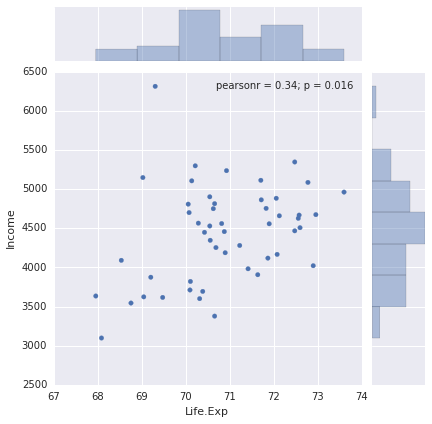

In [29]:
#Now plot a graph of life expectancy vs. income
sb.jointplot(df['Life.Exp'], df['Income'])

In [52]:
#You should be able to find a good model with only 4 independent variables, instead of the original 7. Which variables does this model contain?

y=df['Life.Exp']
x=df[['Population',  'Murder', 'HS.Grad', 'Frost']]
x=sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     31.37
Date:                Wed, 10 Feb 2016   Prob (F-statistic):           1.70e-12
Time:                        20:56:52   Log-Likelihood:                -51.866
No. Observations:                  50   AIC:                             113.7
Df Residuals:                      45   BIC:                             123.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         71.0271      0.953     74.542      0.000        69.108    72.946
Population  5.014e-05   2.51e-05      1.996      0.052     -4.54e-07     0.000
Murder        -0.3001      0.037     -8.199      0.000        -0.374    -0.226
HS.Grad        0.0466      0.015      3.142      0.003         0.017     0.076
Frost         -0.0059      0.002     -2.455      0.018        -0.011    -0.001
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.426
Skew:                          -0.065   Prob(JB):                        0.490
Kurtosis:                       2.183   Cond. No.                     5.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
new_df= x

In [54]:
new_df['pred']=result.predict(x)

In [55]:
new_df

,const,Population,Murder,HS.Grad,Frost,pred
0,1,3615,15.1,41.3,20,68.481119
1,1,365,11.3,66.7,152,69.857404
2,1,2212,7.8,58.1,15,71.414157
3,1,2110,10.1,39.9,65,69.573739
4,1,21198,10.3,62.6,20,71.795646
5,1,2541,6.8,63.9,166,71.103542
6,1,3100,3.1,56.0,139,72.034590
7,1,579,6.2,54.6,103,71.126469
8,1,8277,10.7,52.6,11,70.615395
9,1,4931,13.9,40.6,60,68.636942


In [63]:
df_new = pd.merge(df,new_df,right_index=True,left_index=True)

In [78]:
#Which state do we predict to have the lowest life expectancy? (Hint: use the sort function)

df_new.groupby('state.name').mean().sort('pred')

,Population_x,Income,Illiteracy,Life.Exp,Murder_x,HS.Grad_x,Frost_x,Area,state.area,x,y,const_x,const_y,Population_y,Murder_y,HS.Grad_y,Frost_y,pred
state.name,,,,,,,,,,,,,,,,,,
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,51609,-86.7509,32.5901,1,1,3615,15.1,41.3,20,68.481119
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073,58876,-83.3736,32.3329,1,1,4931,13.9,40.6,60,68.636942
Mississippi,2341,3098,2.4,68.09,12.5,41.0,50,47296,47716,-89.8065,32.6758,1,1,2341,12.5,41.0,50,69.005354
South Carolina,2816,3635,2.3,67.96,11.6,37.8,65,30225,31055,-80.5056,33.6190,1,1,2816,11.6,37.8,65,69.061092
Louisiana,3806,3545,2.8,68.76,13.2,42.2,12,44930,48523,-92.2724,30.6181,1,1,3806,13.2,42.2,12,69.150448
Kentucky,3387,3712,1.6,70.10,10.6,38.5,95,39650,40395,-84.7674,37.3915,1,1,3387,10.6,38.5,95,69.244179
North Carolina,5441,3875,1.8,69.21,11.1,38.5,80,48798,52586,-78.4686,35.4195,1,1,5441,11.1,38.5,80,69.286242
Tennessee,4173,3821,1.7,70.11,11.0,41.8,70,41328,42244,-86.4560,35.6767,1,1,4173,11.0,41.8,70,69.465833
Nevada,590,5149,0.5,69.03,11.5,65.2,188,109889,110540,-116.8510,39.1063,1,1,590,11.5,65.2,188,69.524824


In [76]:
#Which state actually has the lowest life expectancy? (Hint: use the which.min function)


df.groupby('state.name').mean().sort('Life.Exp')

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y,const
state.name,,,,,,,,,,,,
South Carolina,2816,3635,2.3,67.96,11.6,37.8,65,30225,31055,-80.5056,33.6190,1
Mississippi,2341,3098,2.4,68.09,12.5,41.0,50,47296,47716,-89.8065,32.6758,1
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073,58876,-83.3736,32.3329,1
Louisiana,3806,3545,2.8,68.76,13.2,42.2,12,44930,48523,-92.2724,30.6181,1
Nevada,590,5149,0.5,69.03,11.5,65.2,188,109889,110540,-116.8510,39.1063,1
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,51609,-86.7509,32.5901,1
North Carolina,5441,3875,1.8,69.21,11.1,38.5,80,48798,52586,-78.4686,35.4195,1
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,589757,-127.2500,49.2500,1
West Virginia,1799,3617,1.4,69.48,6.7,41.6,100,24070,24181,-80.6665,38.4204,1


In [82]:
#Take a look at the vector of residuals
df_new['residuals']= abs(df_new['pred'] - df_new['Life.Exp'])

In [83]:

df_new.groupby('state.name').mean().sort('residuals')

,Population_x,Income,Illiteracy,Life.Exp,Murder_x,HS.Grad_x,Frost_x,Area,state.area,x,y,const_x,const_y,Population_y,Murder_y,HS.Grad_y,Frost_y,pred,residuals
state.name,,,,,,,,,,,,,,,,,,,
Indiana,5313,4458,0.7,70.88,7.1,52.9,122,36097,36291,-86.0808,40.0495,1,1,5313,7.1,52.9,122,70.901585,0.021585
Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090,58560,-81.6850,27.8744,1,1,8277,10.7,52.6,11,70.615395,0.044605
Illinois,11197,5107,0.9,70.14,10.3,52.6,127,55748,56400,-89.3776,40.0495,1,1,11197,10.3,52.6,127,70.192442,0.052442
Virginia,4981,4701,1.4,70.08,9.5,47.8,85,39780,40815,-78.2005,37.5630,1,1,4981,9.5,47.8,85,70.146914,0.066914
South Dakota,681,4167,0.5,72.08,1.7,53.3,172,75955,77047,-99.7238,44.3365,1,1,681,1.7,53.3,172,72.011609,0.068391
North Carolina,5441,3875,1.8,69.21,11.1,38.5,80,48798,52586,-78.4686,35.4195,1,1,5441,11.1,38.5,80,69.286242,0.076242
New York,18076,4903,1.4,70.55,10.9,52.7,82,47831,49576,-75.1449,43.1361,1,1,18076,10.9,52.7,82,70.629371,0.079371
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,158693,-119.7730,36.5341,1,1,21198,10.3,62.6,20,71.795646,0.085646
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073,58876,-83.3736,32.3329,1,1,4931,13.9,40.6,60,68.636942,0.096942
